In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls gdrive/MyDrive

'20DCE080 KHUSHI - 2.gsite'	    IMG-5867.jpg
'20DCE080 KHUSHI.gsite'		    IMG-7758.jpg
'20DCE080 KHUSHI PATEL.gsite'	    IMG_8948.jpg
'5G Technology HSS.mp4'		   'Interview css.mov'
'aadhar card.jpg'		   'My Journal.gdoc'
'Colab Notebooks'		    PlantVillage.zip
'cpm35 2022-08-12 224831.707.JPG'  'React Projects'
'cpm35 2022-10-15 142024.084.JPG'  'Resume (1).gdoc'
 IMG-0045-Original.jpg		    Resume.gdoc
 IMG-20220504-WA0029.JPG	    RESUME.pdf
 IMG-2444.jpg			    saved_models
 IMG-3254.JPG			    SNAP-20220626-034839.JPG
 IMG-5196.jpg			    SNAP-20220807-212930.JPG
 IMG-5564.jpg			   'Video resume.mov'


In [3]:
!unzip gdrive/MyDrive/PlantVillage.zip

Archive:  gdrive/MyDrive/PlantVillage.zip
   creating: PlantVillage/
   creating: PlantVillage/Potato___Early_blight/
  inflating: PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG  
  inflating: PlantVillage/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG  
  inflating: PlantVillage/Potato___Early_blight/009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG  
  inflating: PlantVillage/Potato___Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG  
  inflating: PlantVillage/Potato___Early_blight/0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG  
  inflating: PlantVillage/Potato___Early_blight/02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG  
  inflating: PlantVillage/Potato___Early_blight/0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020.JPG  
  inflating: PlantVillage/Potato___Early_blight/028f9b73-142f-499a-9c7b-d7c1ed5e5506___RS_Early.B 8546.JPG  
  inflatin

In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE = 256
BATCH_SIZE = 32 
CHANNELS = 3
EPOCHS = 15

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [7]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
len(dataset)

68

In [9]:
68 * 32

2176

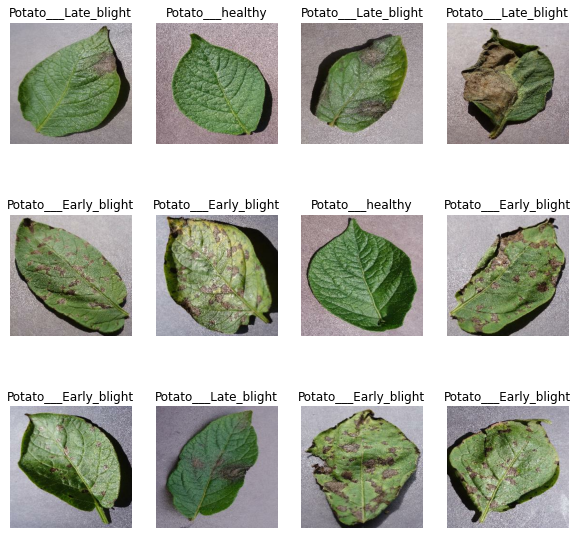

In [10]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [11]:
#80% ==> training 
#20% ==> 10% validation, 10% test

In [12]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [13]:
train_ds = dataset.take(54) #array[:54] first 54
len(train_ds)

54

In [14]:
test_ds = dataset.skip(54) #array[54:] 54 onwards
len(test_ds)

14

In [15]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [16]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [17]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [18]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [19]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds)

54

In [21]:
len(val_ds)

6

In [22]:
len(test_ds)

8

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [24]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [25]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [26]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])

model.build(input_shape = input_shape)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [28]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [29]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/15
54/54 [==============================] - 216s 4s/step - loss: 0.9089 - accuracy: 0.4977 - val_loss: 0.8229 - val_accuracy: 0.5677
Epoch 2/15
54/54 [==============================] - 201s 4s/step - loss: 0.6163 - accuracy: 0.7182 - val_loss: 0.3185 - val_accuracy: 0.8646
Epoch 3/15
54/54 [==============================] - 195s 4s/step - loss: 0.2796 - accuracy: 0.8802 - val_loss: 1.1150 - val_accuracy: 0.6458
Epoch 4/15
54/54 [==============================] - 191s 4s/step - loss: 0.2398 - accuracy: 0.9086 - val_loss: 0.4137 - val_accuracy: 0.8594
Epoch 5/15
54/54 [==============================] - 195s 4s/step - loss: 0.1992 - accuracy: 0.9225 - val_loss: 0.3965 - val_accuracy: 0.8490
Epoch 6/15
54/54 [==============================] - 196s 4s/step - loss: 0.1461 - accuracy: 0.9450 - val_loss: 0.1418 - val_accuracy: 0.9531
Epoch 7/15
54/54 [==============================] - 196s 4s/step - loss: 0.1139 - accuracy: 0.9508 - val_loss: 0.2310 - val_accuracy: 0.9219
Epoch 8/15
54

In [30]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 9s 838ms/step - loss: 0.1701 - accuracy: 0.9375


In [31]:
scores

[0.17013490200042725, 0.9375]

In [32]:
history

In [33]:
history.params

{'verbose': 1, 'epochs': 15, 'steps': 54}

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
history.history['accuracy']

[0.49768519401550293,
 0.7181712985038757,
 0.8802083134651184,
 0.9085648059844971,
 0.9224537014961243,
 0.9450231194496155,
 0.9508101940155029,
 0.9375,
 0.9716435074806213,
 0.9548611044883728,
 0.9641203880310059,
 0.9745370149612427,
 0.9826388955116272,
 0.9739583134651184,
 0.9728009104728699]

In [36]:
len(history.history['accuracy'])

15

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

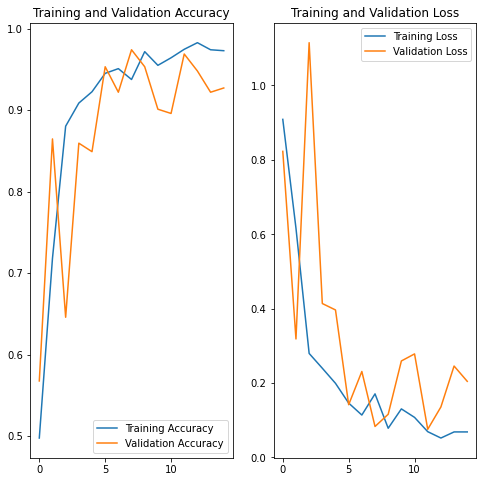

In [38]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict:
actual label:  Potato___Late_blight
1/1 [==============================] - 1s 1s/step
predicted label:  Potato___Late_blight


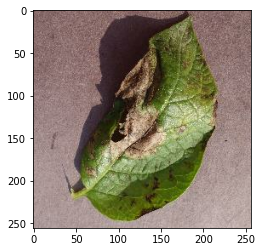

In [39]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print("First image to predict:")
  plt.imshow(first_image)
  print("actual label: ", class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("predicted label: ", class_names[np.argmax(batch_prediction[0])])


In [40]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0) #create a batch

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

1/1 [==============================] - 0s 42ms/step


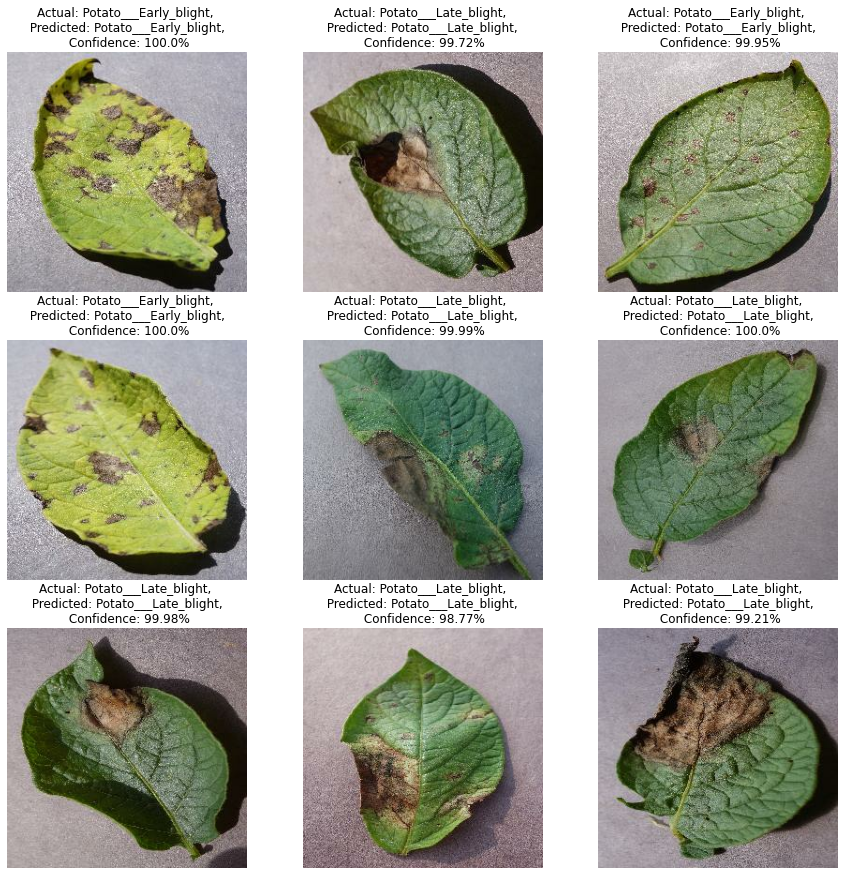

In [41]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))

    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}%")

    plt.axis("off")

In [47]:
model.save('saved_models/1')

In [46]:
model.save('saved_models/2')

In [48]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/saved_models/1.hdf5')

In [49]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/saved_models/2.hdf5')

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
#new_model = tf.keras.models.load_model('/content/drive/MyDrive/saved_models/model1.hdf5')

# Show the model architecture
#new_model.summary()

In [55]:
!zip -r /content/file.zip /content/saved_models


  adding: content/saved_models/ (stored 0%)
  adding: content/saved_models/.ipynb_checkpoints/ (stored 0%)
  adding: content/saved_models/2/ (stored 0%)
  adding: content/saved_models/2/saved_model.pb (deflated 89%)
  adding: content/saved_models/2/assets/ (stored 0%)
  adding: content/saved_models/2/variables/ (stored 0%)
  adding: content/saved_models/2/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/saved_models/2/variables/variables.index (deflated 71%)
  adding: content/saved_models/2/keras_metadata.pb (deflated 94%)
  adding: content/saved_models/1/ (stored 0%)
  adding: content/saved_models/1/saved_model.pb (deflated 89%)
  adding: content/saved_models/1/assets/ (stored 0%)
  adding: content/saved_models/1/variables/ (stored 0%)
  adding: content/saved_models/1/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/saved_models/1/variables/variables.index (deflated 71%)
  adding: content/saved_models/1/keras_metadata.pb (deflated 94%)


In [56]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>